Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


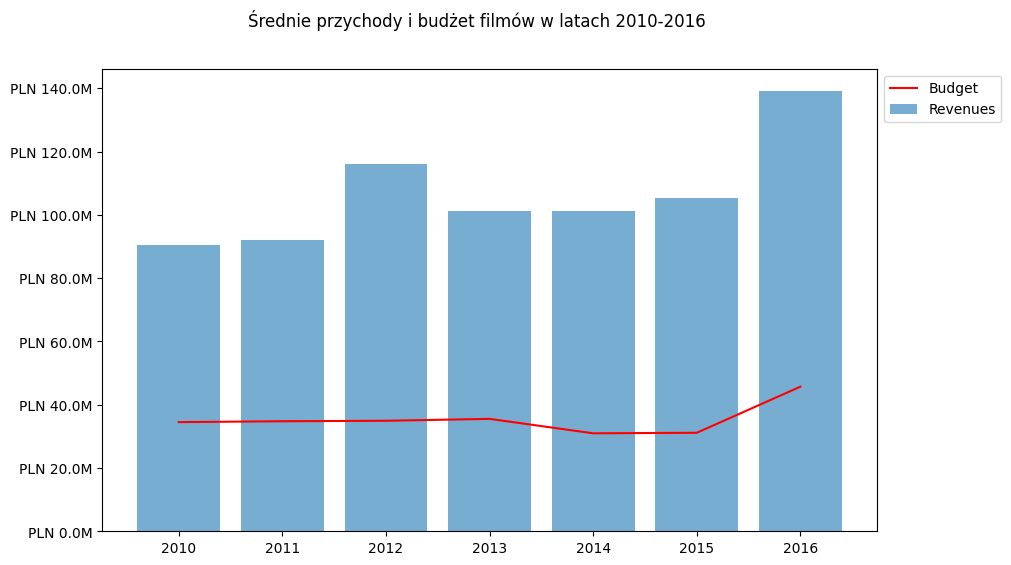

Najczęściej występujący gatunek filmów: Drama. Liczba filmów: 1207
Gatunek filmów o najdłuższym średnim czasie trwania: History. Średni czas trwania: 133.96


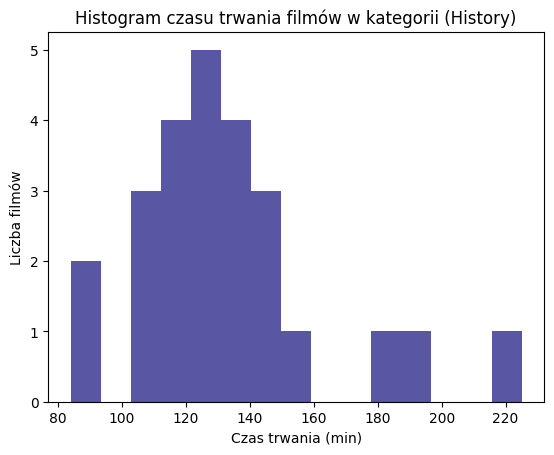

In [175]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
# Pobranie plików
drive.mount('/content/drive')

movies_path = '/content/drive/My Drive/Colab Notebooks/BazaFilmow/tmdb_movies.csv'
genres_path = '/content/drive/My Drive/Colab Notebooks/BazaFilmow/tmdb_genres.csv'

movies = pd.read_csv(movies_path)
genres = pd.read_csv(genres_path)

# Wyliczenie 3. kwartyla liczby głosów i sortowanie
third_quartile = movies['vote_count'].quantile(0.75)

top_rated_movies = movies[movies['vote_count'] > third_quartile].sort_values(by='vote_average', ascending=False).head(10)

# Filtrowanie filmów opublikowanych od 2010 do 2016

movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['year'] = movies['release_date'].dt.year
filtered_movies = movies[(movies['year'] >= 2010) & (movies['year'] <= 2016)]

# Grupowanie po roku i obliczanie średnich dla 'revenue' i 'budget'
grouped = filtered_movies.groupby('year').agg({'revenue': 'mean', 'budget': 'mean'}).reset_index()

# Wykres kolumnowy ukazujący przychody i budżety filmów
def million(x, pos):
        return 'PLN {:2.1f}M'.format(x*1e-6)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(grouped['year'], grouped['revenue'], color='#1f77b4', alpha=0.6, label='Revenues')

ax1.plot(grouped['year'], grouped['budget'], color='r', marker=None, label='Budget')
ax1.yaxis.set_major_formatter(million)
formatter = plt.FuncFormatter(million)

fig.suptitle('Średnie przychody i budżet filmów w latach 2010-2016')
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#Połączenie tabel movies i genres oraz prezentacja wybranych statystyk
movies_merged = pd.merge(movies, genres, left_on='genre_id', right_on='Unnamed: 0')

most_common_genre = movies_merged['genres'].value_counts().idxmax()
most_common_genre_count = movies_merged['genres'].value_counts().max()
print(f"Najczęściej występujący gatunek filmów: {most_common_genre}. Liczba filmów: {most_common_genre_count}")

the_longest_runtime_genre = movies_merged.groupby('genres')['runtime'].mean().idxmax()
the_longest_runtime = movies_merged.groupby('genres')['runtime'].mean().max()
print(f'Gatunek filmów o najdłuższym średnim czasie trwania: {the_longest_runtime_genre}. Średni czas trwania: {the_longest_runtime}')

run_time_by_genre = movies_merged.groupby('genres')['runtime'].mean()
longest_runtime_movies = movies_merged[movies_merged['genres'] == the_longest_runtime_genre]

# Histogram
plt.hist(longest_runtime_movies['runtime'], bins=15, color='#13107C', alpha=0.7)
plt.xlabel('Czas trwania (min)')
plt.ylabel('Liczba filmów')
plt.title(f'Histogram czasu trwania filmów w kategorii ({the_longest_runtime_genre})')

plt.show()

